In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up for plotting
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
def annotate_points(x,y,t,offset=100,df=None, **kwargs):
    ax = plt.gca()
    if df is None:
        data = kwargs.pop('data')
    else:
        data=df.copy()
    for i,row in data.iterrows():
        ax.annotate(row[t], xy=(row[x]*1.01,row[y]))

In [2]:
# import manually compiled data on population, density and covid mortality statistics
df = pd.read_excel('./covid-data/covid_deaths_manual_notes_wikipedia_pop.xlsx')

In [3]:
df = df[~df['deaths_per_100k_pop'].isna()]

In [4]:
df

,Region,Country,City,pop_wikipedia,area_sqkm_wikipedia,catchment_wikipedia,density_wikipedia,Cumulative deaths reported due to COVID-19,deaths_per_100k_pop,Notes,Data source,Reported Date,Wikipedia page,Density note
5,Africa,Nigeria,Lagos,21320000.0,2706.70,Metropolitan,7876.750286,771.0,3.616323,"State; suprisingly small number, however most ...",https://covid19.ncdc.gov.ng/#!,2022-08-15,https://en.wikipedia.org/wiki/Lagos,"The death statistic is for Lagos State, but th..."
7,Africa,South Africa,Johannesburg,8000000.0,3357.00,Urban,2383.080131,22143.0,276.787500,"""Estimated number of excess natural deaths ......",https://www.samrc.ac.za/reports/report-weekly-...,2022-08-10,https://en.wikipedia.org/wiki/Johannesburg,"Used the wikipedia urban statistic, as this is..."
10,Asia,China,Guangzhou,65594622.0,19870.40,Metropolitan,3301.122373,8.0,0.012196,"JHU has Guangdong province, a broader area wit...",https://github.com/CSSEGISandData/COVID-19/blo...,2022-08-13,https://en.wikipedia.org/wiki/Guangzhou,NaN
11,Asia,China,Shanghai,41354149.0,14922.70,Metropolitan,2771.224309,595.0,1.438792,Verified GHS and Shanghai province area on Goo...,https://github.com/CSSEGISandData/COVID-19/blo...,2022-08-13,https://en.wikipedia.org/wiki/Shanghai,NaN
12,Asia,India,Delhi,16787941.0,1484.00,Union Territory (administrative),11312.628706,26376.0,157.112775,NaN,https://github.com/CSSEGISandData/COVID-19/blo...,2022-08-13,https://en.wikipedia.org/wiki/Delhi,The union territory administrative population ...
14,Asia,Indonesia,Jakarta,33430285.0,7062.50,Metropolitan,4733.491681,15304.0,45.778850,See latest data point of graph (estimate didn'...,https://www.fast-trackcities.org/data-visualiz...,2022-07-15,https://en.wikipedia.org/wiki/Jakarta,NaN
15,Asia,Japan,Osaka,8823358.0,1905.14,Metropolitan,4631.343628,5313.0,60.215170,NaN,https://github.com/CSSEGISandData/COVID-19/blo...,2022-08-13,https://en.wikipedia.org/wiki/Osaka_Prefecture,"This is the statistic for Osaka prefecture, as..."
16,Asia,Japan,Tokyo,40700000.0,13452.00,Metropolitan,3025.572406,8700.0,21.375921,"Sum of Chiba,",https://github.com/CSSEGISandData/COVID-19/blo...,2022-08-13,https://en.wikipedia.org/wiki/Tokyo,Note the metropolitan area statistic is given ...
17,Asia,Thailand,Bangkok,14626225.0,7761.60,Metropolitan,1884.434266,7974.0,54.518510,NaN,https://www.fast-trackcities.org/data-visualiz...,2022-07-16,https://en.wikipedia.org/wiki/Bangkok,NaN
18,Europe,France,Paris,13024518.0,18940.70,Metropolitan,687.647130,6119.0,46.980625,"""According to the latest report as of Tuesday ...",https://www.sortiraparis.com/news/coronavirus/...,2022-08-17,https://en.wikipedia.org/wiki/Paris,NaN


In [5]:
df.columns

Index(['Region', 'Country', 'City', 'pop_wikipedia', 'area_sqkm_wikipedia',
       'catchment_wikipedia', 'density_wikipedia',
       'Cumulative deaths reported due to COVID-19', 'deaths_per_100k_pop',
       'Notes', 'Data source', 'Reported Date', 'Wikipedia page',
       'Density note'],
      dtype='object')

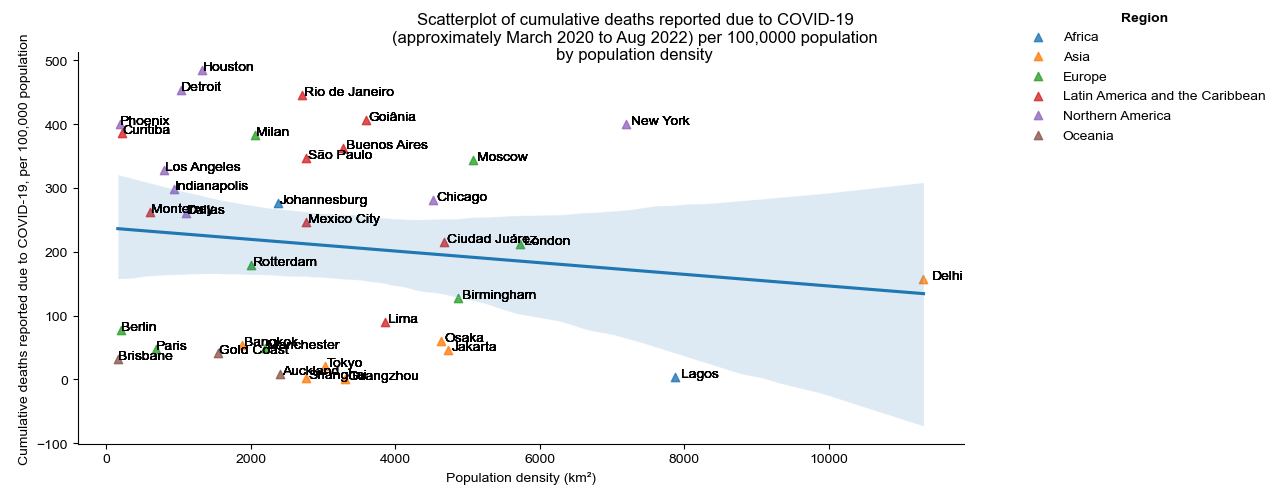

In [6]:
markers=['^']*6
g = sns.lmplot(x="density_wikipedia", 
               y='deaths_per_100k_pop', 
               hue="Region",
               data=df, 
               aspect=2,
               legend=True, 
               fit_reg=False,
               logx=True,
               ci=95,
              truncate=True,
              markers=markers)
sns.regplot(x="density_wikipedia", 
            y='deaths_per_100k_pop', 
            data=df, 
            scatter=False, 
            ax=g.axes[0, 0])
g.map_dataframe(annotate_points,'density_wikipedia','deaths_per_100k_pop','City',df=df.copy())
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Scatterplot of cumulative deaths reported due to COVID-19\n(approximately March 2020 to Aug 2022) per 100,0000 population\nby population density')
g.set_axis_labels("Population density (km²)", 'Cumulative deaths reported due to COVID-19, per 100,000 population')
g.legend.set_title('Region',prop={'weight':'bold'})
sns.move_legend(g, "upper right")
sns.set_theme(style='white')

In [7]:
g.fig.savefig('Scatterplot of cumulative deaths reported due to COVID-19.jpg',dpi=300)

In [8]:
df[['density_wikipedia','deaths_per_100k_pop']].corr(method='pearson')

,density_wikipedia,deaths_per_100k_pop
density_wikipedia,1.000000,-0.138739
deaths_per_100k_pop,-0.138739,1.000000


In [9]:
len(df)

37

In [10]:
df['Region'].unique()

array(['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
       'Northern America', 'Oceania'], dtype=object)

## Sensitivity analysis excluding outlying cities of Delhi, Lagos and New York

In [11]:
# Excluding Delhi and Lago
df_excl_Delhi_Lago = df.query("City not in ['Delhi','Lagos']")
markers=['^']*6
g = sns.lmplot(x="density_wikipedia", 
               y='deaths_per_100k_pop', 
               hue="Region",
               data=df_excl_Delhi_Lago, 
               aspect=2,
               legend=True, 
               fit_reg=False,
               logx=True,
               ci=95,
              truncate=True,
              markers=markers)
sns.regplot(x="density_wikipedia", 
            y='deaths_per_100k_pop', 
            data=df_excl_Delhi_Lago, 
            scatter=False, 
            ax=g.axes[0, 0])
g.map_dataframe(annotate_points,'density_wikipedia','deaths_per_100k_pop','City',df=df_excl_Delhi_Lago.copy())
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Scatterplot of cumulative deaths reported due to COVID-19\n(approximately March 2020 to Aug 2022) per 100,0000 population\nby population density')
g.set_axis_labels("Population density (km²)", 'Cumulative deaths reported due to COVID-19\nper 100,000 population')
g.legend.set_title('Region',prop={'weight':'bold'})
sns.move_legend(g, "upper right")
sns.set_theme(style='white')
g.fig.savefig('Sensitivity analysis excl Delhi Lagos.jpg',dpi=300)
df_excl_Delhi_Lago[['density_wikipedia','deaths_per_100k_pop']].corr(method='pearson')

,density_wikipedia,deaths_per_100k_pop
density_wikipedia,1.000000,-0.034714
deaths_per_100k_pop,-0.034714,1.000000


In [12]:
# Excluding Delhi, Lago and New York City
df_excl_Delhi_Lago_NYC = df.query("City not in ['Delhi','Lagos','New York']")
markers=['^']*6
g = sns.lmplot(x="density_wikipedia", 
               y='deaths_per_100k_pop', 
               hue="Region",
               data=df_excl_Delhi_Lago_NYC, 
               aspect=2,
               legend=True, 
               fit_reg=False,
               logx=True,
               ci=95,
              truncate=True,
              markers=markers)
sns.regplot(x="density_wikipedia", 
            y='deaths_per_100k_pop', 
            data=df_excl_Delhi_Lago_NYC, 
            scatter=False, 
            ax=g.axes[0, 0])
g.map_dataframe(annotate_points,'density_wikipedia','deaths_per_100k_pop','City',df=df_excl_Delhi_Lago_NYC.copy())
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Scatterplot of cumulative deaths reported due to COVID-19\n(approximately March 2020 to Aug 2022) per 100,0000 population\nby population density')
g.set_axis_labels("Population density (km²)", 'Cumulative deaths reported due to COVID-19\nper 100,000 population')
g.legend.set_title('Region',prop={'weight':'bold'})
sns.move_legend(g, "upper right")
sns.set_theme(style='white')
g.fig.savefig('Sensitivity analysis excl Delhi Lagos NYC.jpg',dpi=300)
df_excl_Delhi_Lago_NYC[['density_wikipedia','deaths_per_100k_pop']].corr(method='pearson')

,density_wikipedia,deaths_per_100k_pop
density_wikipedia,1.000000,-0.141856
deaths_per_100k_pop,-0.141856,1.000000
